In [1]:
import pandas as pd
import numpy as np
from sklearn import preprocessing

In [2]:
df=pd.read_csv('F:\data\loan_approval_dataset.csv')

In [109]:
df

,Loan_id,No_of_dependents,Education,self_employed,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value,loan_status
0,1,2,0,0,9600000,29900000,12,778,2400000,17600000,22700000,8000000,0
1,2,0,1,1,4100000,12200000,8,417,2700000,2200000,8800000,3300000,1
2,3,3,0,0,9100000,29700000,20,506,7100000,4500000,33300000,12800000,1
3,4,3,0,0,8200000,30700000,8,467,18200000,3300000,23300000,7900000,1
4,5,5,1,1,9800000,24200000,20,382,12400000,8200000,29400000,5000000,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4264,4265,5,0,1,1000000,2300000,12,317,2800000,500000,3300000,800000,1
4265,4266,0,1,1,3300000,11300000,20,559,4200000,2900000,11000000,1900000,0
4266,4267,2,1,0,6500000,23900000,18,457,1200000,12400000,18100000,7300000,1
4267,4268,1,1,0,4100000,12800000,8,780,8200000,700000,14100000,5800000,0


In [4]:
df1=df.copy()

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4269 entries, 0 to 4268
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Loan_id                   4269 non-null   int64 
 1   No_of_dependents          4269 non-null   int64 
 2   Education                 4269 non-null   object
 3   self_employed             4269 non-null   object
 4   income_annum              4269 non-null   int64 
 5   loan_amount               4269 non-null   int64 
 6   loan_term                 4269 non-null   int64 
 7   cibil_score               4269 non-null   int64 
 8   residential_assets_value  4269 non-null   int64 
 9   commercial_assets_value   4269 non-null   int64 
 10  luxury_assets_value       4269 non-null   int64 
 11  bank_asset_value          4269 non-null   int64 
 12  loan_status               4269 non-null   object
dtypes: int64(10), object(3)
memory usage: 433.7+ KB


In [6]:
df.isnull().sum()

Loan_id                     0
No_of_dependents            0
Education                   0
self_employed               0
income_annum                0
loan_amount                 0
loan_term                   0
cibil_score                 0
residential_assets_value    0
commercial_assets_value     0
luxury_assets_value         0
bank_asset_value            0
loan_status                 0
dtype: int64

In [7]:
df.describe()


,Loan_id,No_of_dependents,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value
count,4269.000000,4269.000000,4.269000e+03,4.269000e+03,4269.000000,4269.000000,4.269000e+03,4.269000e+03,4.269000e+03,4.269000e+03
mean,2135.000000,2.498712,5.059124e+06,1.513345e+07,10.900445,599.936051,7.472617e+06,4.973155e+06,1.512631e+07,4.976692e+06
std,1232.498479,1.695910,2.806840e+06,9.043363e+06,5.709187,172.430401,6.503637e+06,4.388966e+06,9.103754e+06,3.250185e+06
min,1.000000,0.000000,2.000000e+05,3.000000e+05,2.000000,300.000000,-1.000000e+05,0.000000e+00,3.000000e+05,0.000000e+00
25%,1068.000000,1.000000,2.700000e+06,7.700000e+06,6.000000,453.000000,2.200000e+06,1.300000e+06,7.500000e+06,2.300000e+06
50%,2135.000000,3.000000,5.100000e+06,1.450000e+07,10.000000,600.000000,5.600000e+06,3.700000e+06,1.460000e+07,4.600000e+06
75%,3202.000000,4.000000,7.500000e+06,2.150000e+07,16.000000,748.000000,1.130000e+07,7.600000e+06,2.170000e+07,7.100000e+06
max,4269.000000,5.000000,9.900000e+06,3.950000e+07,20.000000,900.000000,2.910000e+07,1.940000e+07,3.920000e+07,1.470000e+07


In [8]:
df.Education.value_counts()

Education
 Graduate        2144
 Not Graduate    2125
Name: count, dtype: int64

In [9]:
df.self_employed.value_counts()

self_employed
 Yes    2150
 No     2119
Name: count, dtype: int64

In [10]:
df.loan_status.value_counts()

loan_status
 Approved    2656
 Rejected    1613
Name: count, dtype: int64

In [11]:
label_encoder = preprocessing.LabelEncoder() 
df['Education']= label_encoder.fit_transform(df['Education'])
df['Education'].unique()

array([0, 1])

In [12]:
label_encoder = preprocessing.LabelEncoder() 
df['self_employed']= label_encoder.fit_transform(df['self_employed'])
df['self_employed'].unique()

array([0, 1])

In [13]:
label_encoder = preprocessing.LabelEncoder() 
df['loan_status']= label_encoder.fit_transform(df['loan_status'])
df['loan_status'].unique()

array([0, 1])

In [14]:
df

,Loan_id,No_of_dependents,Education,self_employed,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value,loan_status
0,1,2,0,0,9600000,29900000,12,778,2400000,17600000,22700000,8000000,0
1,2,0,1,1,4100000,12200000,8,417,2700000,2200000,8800000,3300000,1
2,3,3,0,0,9100000,29700000,20,506,7100000,4500000,33300000,12800000,1
3,4,3,0,0,8200000,30700000,8,467,18200000,3300000,23300000,7900000,1
4,5,5,1,1,9800000,24200000,20,382,12400000,8200000,29400000,5000000,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4264,4265,5,0,1,1000000,2300000,12,317,2800000,500000,3300000,800000,1
4265,4266,0,1,1,3300000,11300000,20,559,4200000,2900000,11000000,1900000,0
4266,4267,2,1,0,6500000,23900000,18,457,1200000,12400000,18100000,7300000,1
4267,4268,1,1,0,4100000,12800000,8,780,8200000,700000,14100000,5800000,0


In [15]:
x=df.iloc[:,:12]
x

,Loan_id,No_of_dependents,Education,self_employed,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value
0,1,2,0,0,9600000,29900000,12,778,2400000,17600000,22700000,8000000
1,2,0,1,1,4100000,12200000,8,417,2700000,2200000,8800000,3300000
2,3,3,0,0,9100000,29700000,20,506,7100000,4500000,33300000,12800000
3,4,3,0,0,8200000,30700000,8,467,18200000,3300000,23300000,7900000
4,5,5,1,1,9800000,24200000,20,382,12400000,8200000,29400000,5000000
...,...,...,...,...,...,...,...,...,...,...,...,...
4264,4265,5,0,1,1000000,2300000,12,317,2800000,500000,3300000,800000
4265,4266,0,1,1,3300000,11300000,20,559,4200000,2900000,11000000,1900000
4266,4267,2,1,0,6500000,23900000,18,457,1200000,12400000,18100000,7300000
4267,4268,1,1,0,4100000,12800000,8,780,8200000,700000,14100000,5800000


In [16]:
y=df.iloc[:,[-1]]

In [17]:
y

,loan_status
0,0
1,1
2,1
3,1
4,1
...,...
4264,1
4265,0
4266,1
4267,0


In [18]:
from sklearn.model_selection import train_test_split

In [19]:
x_train,x_test,y_train,y_test = train_test_split(x,y,random_state=84,test_size=0.30,shuffle=True)

In [20]:
x_train.sort_index(ascending=True,inplace=True)
x_train

,Loan_id,No_of_dependents,Education,self_employed,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value
2,3,3,0,0,9100000,29700000,20,506,7100000,4500000,33300000,12800000
3,4,3,0,0,8200000,30700000,8,467,18200000,3300000,23300000,7900000
4,5,5,1,1,9800000,24200000,20,382,12400000,8200000,29400000,5000000
5,6,0,0,1,4800000,13500000,10,319,6800000,8300000,13700000,5100000
6,7,5,0,0,8700000,33000000,4,678,22500000,14800000,29200000,4300000
...,...,...,...,...,...,...,...,...,...,...,...,...
4256,4257,3,0,1,7400000,18300000,4,348,14300000,12600000,17900000,9800000
4258,4259,5,0,1,9700000,22600000,16,346,23500000,12900000,26800000,13000000
4259,4260,0,1,1,4500000,11500000,14,509,13400000,2300000,15400000,5900000
4263,4264,3,0,0,5000000,12700000,14,865,4700000,8100000,19500000,6300000


In [21]:
y_train.sort_index(ascending=True,inplace=True)
y_train

,loan_status
2,1
3,1
4,1
5,1
6,0
...,...
4256,1
4258,1
4259,1
4263,0


In [22]:
x_test.sort_index(ascending=True,inplace=True)
x_test

,Loan_id,No_of_dependents,Education,self_employed,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value
0,1,2,0,0,9600000,29900000,12,778,2400000,17600000,22700000,8000000
1,2,0,1,1,4100000,12200000,8,417,2700000,2200000,8800000,3300000
7,8,2,0,1,5700000,15000000,20,382,13200000,5700000,11800000,6000000
8,9,0,0,1,800000,2200000,20,782,1300000,800000,2800000,600000
10,11,4,0,1,2900000,11200000,2,547,8100000,4700000,9500000,3100000
...,...,...,...,...,...,...,...,...,...,...,...,...
4262,4263,5,0,0,1300000,3000000,20,540,1000000,2300000,3200000,1900000
4264,4265,5,0,1,1000000,2300000,12,317,2800000,500000,3300000,800000
4265,4266,0,1,1,3300000,11300000,20,559,4200000,2900000,11000000,1900000
4267,4268,1,1,0,4100000,12800000,8,780,8200000,700000,14100000,5800000


In [23]:
y_test.sort_index(ascending=True,inplace=True)
y_test

,loan_status
0,0
1,1
7,1
8,0
10,0
...,...
4262,1
4264,1
4265,0
4267,0


In [24]:
# Using UNSCALED DATA for the prediction

In [25]:
#LOGISTIC REGRESSION
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score
from sklearn.metrics import classification_report
logreg = LogisticRegression(random_state=42)
logreg.fit(x_train,y_train)
y_pred=logreg.predict(x_test)
acc=accuracy_score(y_test,y_pred)
print(acc*100)

C:\Users\NISHA\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


61.04605776736924


In [26]:
ps=precision_score(y_test,y_pred)
ps

0.7142857142857143

In [27]:
rc=recall_score(y_test,y_pred)
rc

0.0099601593625498

In [28]:
cm=confusion_matrix(y_test,y_pred)
cm

array([[777,   2],
       [497,   5]], dtype=int64)

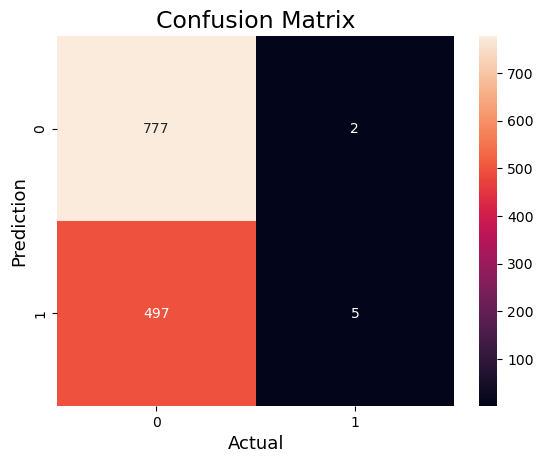

In [29]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.heatmap(cm,annot=True,fmt='g')
plt.ylabel('Prediction',fontsize=13)
plt.xlabel('Actual',fontsize=13)
plt.title('Confusion Matrix', fontsize=17)
plt.show()

In [30]:
print(classification_report(y_test,y_pred,labels=[1]))

              precision    recall  f1-score   support

           1       0.71      0.01      0.02       502

   micro avg       0.71      0.01      0.02       502
   macro avg       0.71      0.01      0.02       502
weighted avg       0.71      0.01      0.02       502



In [31]:
# Here, I used the raw (unscaled numerical data) numerical data for prediction in LOGISTIC REGRESSION algorithm. 
# Accuracy of the model is 61%.
# But the False Negative value is 2.


In [32]:
#RANDOM FOREST
from sklearn.ensemble import RandomForestClassifier
Classifier= RandomForestClassifier(n_estimators= 100, criterion= "entropy")
Classifier.fit(x_train,y_train)
y_pred1=Classifier.predict(x_test)
acc=accuracy_score(y_test,y_pred1)
print(acc*100)

C:\Users\NISHA\AppData\Local\Temp\ipykernel_1036\3690713137.py:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  Classifier.fit(x_train,y_train)


97.26775956284153


In [33]:
ps1=precision_score(y_test,y_pred1)
ps1

0.9755600814663951

In [34]:
rc1=recall_score(y_test,y_pred1)
rc1

0.954183266932271

In [35]:
cm1=confusion_matrix(y_test,y_pred1)
cm1

array([[767,  12],
       [ 23, 479]], dtype=int64)

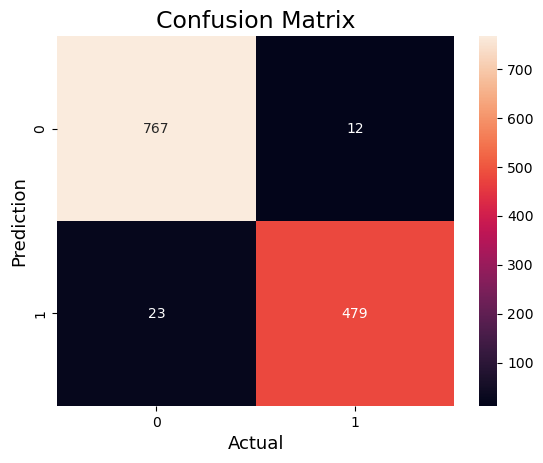

In [36]:
sns.heatmap(cm1,annot=True,fmt='g')
plt.ylabel('Prediction',fontsize=13)
plt.xlabel('Actual',fontsize=13)
plt.title('Confusion Matrix', fontsize=17)
plt.show()

In [37]:
print(classification_report(y_test,y_pred1,labels=[1]))

              precision    recall  f1-score   support

           1       0.98      0.95      0.96       502

   micro avg       0.98      0.95      0.96       502
   macro avg       0.98      0.95      0.96       502
weighted avg       0.98      0.95      0.96       502



In [38]:
# Using unscaled numerical data in RANDOM FOREST algorithm.
# The ACCURACY is 97%
# But False Negative value is 12.

In [39]:
#DECISION TREE ALGORITHM
from sklearn.tree import DecisionTreeClassifier
dtree=DecisionTreeClassifier(criterion='gini',max_depth=5,min_samples_split=2,min_samples_leaf=1)
dtree.fit(x_train,y_train)
y_pred2=dtree.predict(x_test)
acc2=accuracy_score(y_test,y_pred2)
print(acc2*100)

96.87743950039032


In [40]:
ps2=precision_score(y_test,y_pred2)
ps2

0.9425287356321839

In [41]:
rc2=recall_score(y_test,y_pred2)
rc2

0.9800796812749004

In [42]:
cm2=confusion_matrix(y_test,y_pred2)
cm2

array([[749,  30],
       [ 10, 492]], dtype=int64)

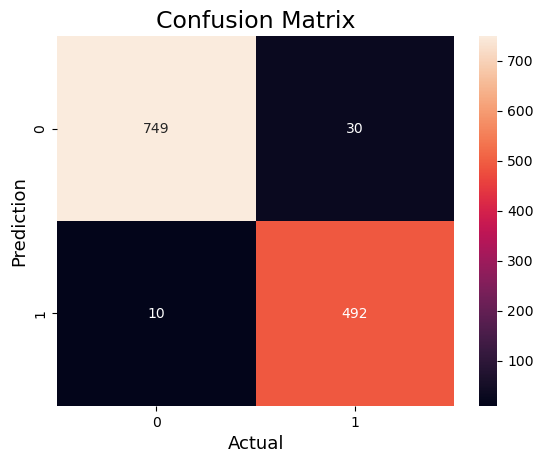

In [43]:
sns.heatmap(cm2,annot=True,fmt='g')
plt.ylabel('Prediction',fontsize=13)
plt.xlabel('Actual',fontsize=13)
plt.title('Confusion Matrix', fontsize=17)
plt.show()

In [44]:
print(classification_report(y_test,y_pred2,labels=[1]))

              precision    recall  f1-score   support

           1       0.94      0.98      0.96       502

   micro avg       0.94      0.98      0.96       502
   macro avg       0.94      0.98      0.96       502
weighted avg       0.94      0.98      0.96       502



In [45]:
# Using unscaled numerical data in DECISION TREE algorithm.
# The ACCURACY is 97%.
# But the False Negative value is 30.

In [ ]:
# UNSCALED DATA CONCLUSION
# Here i've used LOGISTIC REGRESSION, RANDOM FOREST AND DECISION TREE algorithms 

    ALGORITHMS              ACC (%)     PS       RC     FN
------------------------------------------------------------
1) Logistic regression        61       0.7     0.009     2
2) Random forest              97      0.96      0.95    15
3) Decision tree             96.8     0.94      0.98    30

In [46]:
#   Conclusion, The model is more effective when using Random forest algorithm for prediciton 
#   and worst prediction in Logistic regrssion.

In [47]:
# SCALING THE DATA 

In [48]:
df1

,Loan_id,No_of_dependents,Education,self_employed,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value,loan_status
0,1,2,Graduate,No,9600000,29900000,12,778,2400000,17600000,22700000,8000000,Approved
1,2,0,Not Graduate,Yes,4100000,12200000,8,417,2700000,2200000,8800000,3300000,Rejected
2,3,3,Graduate,No,9100000,29700000,20,506,7100000,4500000,33300000,12800000,Rejected
3,4,3,Graduate,No,8200000,30700000,8,467,18200000,3300000,23300000,7900000,Rejected
4,5,5,Not Graduate,Yes,9800000,24200000,20,382,12400000,8200000,29400000,5000000,Rejected
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4264,4265,5,Graduate,Yes,1000000,2300000,12,317,2800000,500000,3300000,800000,Rejected
4265,4266,0,Not Graduate,Yes,3300000,11300000,20,559,4200000,2900000,11000000,1900000,Approved
4266,4267,2,Not Graduate,No,6500000,23900000,18,457,1200000,12400000,18100000,7300000,Rejected
4267,4268,1,Not Graduate,No,4100000,12800000,8,780,8200000,700000,14100000,5800000,Approved


In [49]:
df_num=df1.select_dtypes(include=[int,float])
df_num

,Loan_id,No_of_dependents,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value
0,1,2,9600000,29900000,12,778,2400000,17600000,22700000,8000000
1,2,0,4100000,12200000,8,417,2700000,2200000,8800000,3300000
2,3,3,9100000,29700000,20,506,7100000,4500000,33300000,12800000
3,4,3,8200000,30700000,8,467,18200000,3300000,23300000,7900000
4,5,5,9800000,24200000,20,382,12400000,8200000,29400000,5000000
...,...,...,...,...,...,...,...,...,...,...
4264,4265,5,1000000,2300000,12,317,2800000,500000,3300000,800000
4265,4266,0,3300000,11300000,20,559,4200000,2900000,11000000,1900000
4266,4267,2,6500000,23900000,18,457,1200000,12400000,18100000,7300000
4267,4268,1,4100000,12800000,8,780,8200000,700000,14100000,5800000


In [50]:
df_cat=df1.select_dtypes(include=[object])
df_cat

,Education,self_employed,loan_status
0,Graduate,No,Approved
1,Not Graduate,Yes,Rejected
2,Graduate,No,Rejected
3,Graduate,No,Rejected
4,Not Graduate,Yes,Rejected
...,...,...,...
4264,Graduate,Yes,Rejected
4265,Not Graduate,Yes,Approved
4266,Not Graduate,No,Rejected
4267,Not Graduate,No,Approved


In [51]:
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler

In [52]:
# using MinMax Scaler 

In [53]:
mm=MinMaxScaler()
n=mm.fit_transform(df_num)
df_mm=pd.DataFrame(n,columns=df_num.columns)
df_mm

,Loan_id,No_of_dependents,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value
0,0.000000,0.4,0.969072,0.755102,0.555556,0.796667,0.085616,0.907216,0.575835,0.544218
1,0.000234,0.0,0.402062,0.303571,0.333333,0.195000,0.095890,0.113402,0.218509,0.224490
2,0.000469,0.6,0.917526,0.750000,1.000000,0.343333,0.246575,0.231959,0.848329,0.870748
3,0.000703,0.6,0.824742,0.775510,0.333333,0.278333,0.626712,0.170103,0.591260,0.537415
4,0.000937,1.0,0.989691,0.609694,1.000000,0.136667,0.428082,0.422680,0.748072,0.340136
...,...,...,...,...,...,...,...,...,...,...
4264,0.999063,1.0,0.082474,0.051020,0.555556,0.028333,0.099315,0.025773,0.077121,0.054422
4265,0.999297,0.0,0.319588,0.280612,1.000000,0.431667,0.147260,0.149485,0.275064,0.129252
4266,0.999531,0.4,0.649485,0.602041,0.888889,0.261667,0.044521,0.639175,0.457584,0.496599
4267,0.999766,0.2,0.402062,0.318878,0.333333,0.800000,0.284247,0.036082,0.354756,0.394558


In [54]:
#sc=StandardScaler()
#c=sc.fit_transform(df_num)
#df_sc=pd.DataFrame(c,columns=df_num.columns)
#df_sc

In [55]:
# using Label encoding

In [56]:
label_encoder = preprocessing.LabelEncoder() 
df_cat['Education']= label_encoder.fit_transform(df_cat['Education'])
df_cat['Education'].unique()

array([0, 1])

In [57]:
label_encoder = preprocessing.LabelEncoder() 
df_cat['self_employed']= label_encoder.fit_transform(df_cat['self_employed'])
df_cat['self_employed'].unique()

array([0, 1])

In [58]:
label_encoder = preprocessing.LabelEncoder() 
df_cat['loan_status']= label_encoder.fit_transform(df_cat['loan_status'])
df_cat['loan_status'].unique()

array([0, 1])

In [59]:
df_cat

,Education,self_employed,loan_status
0,0,0,0
1,1,1,1
2,0,0,1
3,0,0,1
4,1,1,1
...,...,...,...
4264,0,1,1
4265,1,1,0
4266,1,0,1
4267,1,0,0


In [60]:
df_pre=pd.concat([df_mm,df_cat],axis=1)
df_pre

,Loan_id,No_of_dependents,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value,Education,self_employed,loan_status
0,0.000000,0.4,0.969072,0.755102,0.555556,0.796667,0.085616,0.907216,0.575835,0.544218,0,0,0
1,0.000234,0.0,0.402062,0.303571,0.333333,0.195000,0.095890,0.113402,0.218509,0.224490,1,1,1
2,0.000469,0.6,0.917526,0.750000,1.000000,0.343333,0.246575,0.231959,0.848329,0.870748,0,0,1
3,0.000703,0.6,0.824742,0.775510,0.333333,0.278333,0.626712,0.170103,0.591260,0.537415,0,0,1
4,0.000937,1.0,0.989691,0.609694,1.000000,0.136667,0.428082,0.422680,0.748072,0.340136,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4264,0.999063,1.0,0.082474,0.051020,0.555556,0.028333,0.099315,0.025773,0.077121,0.054422,0,1,1
4265,0.999297,0.0,0.319588,0.280612,1.000000,0.431667,0.147260,0.149485,0.275064,0.129252,1,1,0
4266,0.999531,0.4,0.649485,0.602041,0.888889,0.261667,0.044521,0.639175,0.457584,0.496599,1,0,1
4267,0.999766,0.2,0.402062,0.318878,0.333333,0.800000,0.284247,0.036082,0.354756,0.394558,1,0,0


In [61]:
x1=df_pre.iloc[:,:12]
x1

,Loan_id,No_of_dependents,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value,Education,self_employed
0,0.000000,0.4,0.969072,0.755102,0.555556,0.796667,0.085616,0.907216,0.575835,0.544218,0,0
1,0.000234,0.0,0.402062,0.303571,0.333333,0.195000,0.095890,0.113402,0.218509,0.224490,1,1
2,0.000469,0.6,0.917526,0.750000,1.000000,0.343333,0.246575,0.231959,0.848329,0.870748,0,0
3,0.000703,0.6,0.824742,0.775510,0.333333,0.278333,0.626712,0.170103,0.591260,0.537415,0,0
4,0.000937,1.0,0.989691,0.609694,1.000000,0.136667,0.428082,0.422680,0.748072,0.340136,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...
4264,0.999063,1.0,0.082474,0.051020,0.555556,0.028333,0.099315,0.025773,0.077121,0.054422,0,1
4265,0.999297,0.0,0.319588,0.280612,1.000000,0.431667,0.147260,0.149485,0.275064,0.129252,1,1
4266,0.999531,0.4,0.649485,0.602041,0.888889,0.261667,0.044521,0.639175,0.457584,0.496599,1,0
4267,0.999766,0.2,0.402062,0.318878,0.333333,0.800000,0.284247,0.036082,0.354756,0.394558,1,0


In [62]:
y1=df_pre.iloc[:,[-1]]
y1

,loan_status
0,0
1,1
2,1
3,1
4,1
...,...
4264,1
4265,0
4266,1
4267,0


In [63]:
x_trainn,x_testt,y_trainn,y_testt=train_test_split(x1,y1,random_state=94,test_size=0.30,shuffle=True)

In [64]:
x_trainn.sort_index(ascending=True,inplace=True)
x_trainn

,Loan_id,No_of_dependents,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value,Education,self_employed
0,0.000000,0.4,0.969072,0.755102,0.555556,0.796667,0.085616,0.907216,0.575835,0.544218,0,0
1,0.000234,0.0,0.402062,0.303571,0.333333,0.195000,0.095890,0.113402,0.218509,0.224490,1,1
2,0.000469,0.6,0.917526,0.750000,1.000000,0.343333,0.246575,0.231959,0.848329,0.870748,0,0
4,0.000937,1.0,0.989691,0.609694,1.000000,0.136667,0.428082,0.422680,0.748072,0.340136,1,1
5,0.001172,0.0,0.474227,0.336735,0.444444,0.031667,0.236301,0.427835,0.344473,0.346939,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...
4263,0.998828,0.6,0.494845,0.316327,0.666667,0.941667,0.164384,0.417526,0.493573,0.428571,0,0
4264,0.999063,1.0,0.082474,0.051020,0.555556,0.028333,0.099315,0.025773,0.077121,0.054422,0,1
4266,0.999531,0.4,0.649485,0.602041,0.888889,0.261667,0.044521,0.639175,0.457584,0.496599,1,0
4267,0.999766,0.2,0.402062,0.318878,0.333333,0.800000,0.284247,0.036082,0.354756,0.394558,1,0


In [65]:
y_trainn.sort_index(ascending=True,inplace=True)
y_trainn

,loan_status
0,0
1,1
2,1
4,1
5,1
...,...
4263,0
4264,1
4266,1
4267,0


In [66]:
x_testt.sort_index(ascending=True,inplace=True)
x_testt

,Loan_id,No_of_dependents,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value,Education,self_employed
3,0.000703,0.6,0.824742,0.775510,0.333333,0.278333,0.626712,0.170103,0.591260,0.537415,0,0
6,0.001406,1.0,0.876289,0.834184,0.111111,0.630000,0.773973,0.762887,0.742931,0.292517,0,0
9,0.002109,1.0,0.092784,0.102041,0.444444,0.146667,0.113014,0.072165,0.077121,0.108844,1,0
17,0.003983,0.8,0.278351,0.232143,0.666667,0.800000,0.102740,0.144330,0.164524,0.292517,1,1
20,0.004686,0.4,0.494845,0.487245,0.555556,0.025000,0.328767,0.082474,0.455013,0.414966,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
4249,0.995548,0.8,0.092784,0.094388,0.666667,0.978333,0.085616,0.077320,0.100257,0.108844,0,0
4252,0.996251,0.6,0.402062,0.352041,0.444444,0.000000,0.263699,0.108247,0.208226,0.149660,1,0
4259,0.997891,0.0,0.443299,0.285714,0.666667,0.348333,0.462329,0.118557,0.388175,0.401361,1,1
4262,0.998594,1.0,0.113402,0.068878,1.000000,0.400000,0.037671,0.118557,0.074550,0.129252,0,0


In [67]:
y_testt.sort_index(ascending=True,inplace=True)
y_testt

,loan_status
3,1
6,0
9,1
17,0
20,1
...,...
4249,0
4252,1
4259,1
4262,1


In [68]:
#LOGISTIC REGRESSION
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score
from sklearn.metrics import classification_report
logregg = LogisticRegression(random_state=92)
logregg.fit(x_trainn,y_trainn)
y_predd=logregg.predict(x_testt)
ac=accuracy_score(y_testt,y_predd)
print(ac*100)

91.17876658860266


C:\Users\NISHA\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [69]:
pss=precision_score(y_testt,y_predd)
pss

0.8790496760259179

In [70]:
rcc=recall_score(y_testt,y_predd)
rcc

0.8771551724137931

In [71]:
cmm=confusion_matrix(y_testt,y_predd)
cmm

array([[761,  56],
       [ 57, 407]], dtype=int64)

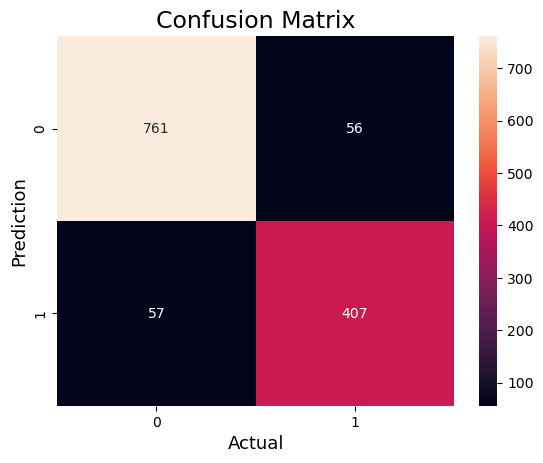

In [72]:
sns.heatmap(cmm,annot=True,fmt='g')
plt.ylabel('Prediction',fontsize=13)
plt.xlabel('Actual',fontsize=13)
plt.title('Confusion Matrix', fontsize=17)
plt.show()

In [73]:
print(classification_report(y_testt,y_predd,labels=[1]))

              precision    recall  f1-score   support

           1       0.88      0.88      0.88       464

   micro avg       0.88      0.88      0.88       464
   macro avg       0.88      0.88      0.88       464
weighted avg       0.88      0.88      0.88       464



In [74]:
# using scaled numerical data in LOGISTIC REGRESSION algorithm
# The ACCURACY is 91%.
# The False Negative value is 56.

In [75]:
#RANDOM FOREST
from sklearn.ensemble import RandomForestClassifier
Classifierr= RandomForestClassifier(n_estimators= 100, criterion= "entropy")
Classifierr.fit(x_trainn,y_trainn)
y_predd1=Classifierr.predict(x_testt)
ac1=accuracy_score(y_testt,y_predd1)
print(ac1*100)

C:\Users\NISHA\AppData\Local\Temp\ipykernel_1036\1593659072.py:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  Classifierr.fit(x_trainn,y_trainn)


97.81420765027322


In [76]:
pcc1=precision_score(y_testt,y_predd1)
pcc1

0.9718614718614719

In [77]:
rcc1=recall_score(y_testt,y_predd1)
rcc1

0.9676724137931034

In [78]:
cmm1=confusion_matrix(y_testt,y_predd1)
cmm1

array([[804,  13],
       [ 15, 449]], dtype=int64)

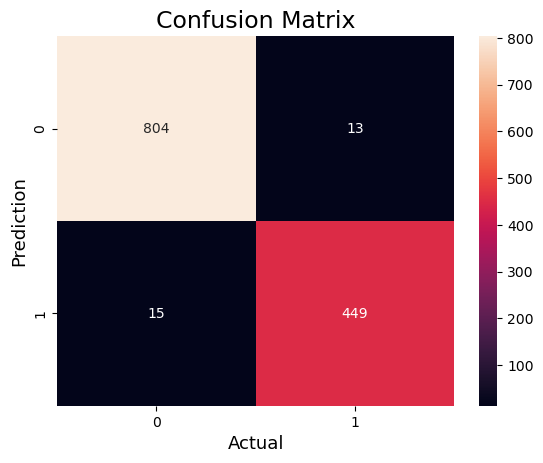

In [79]:
sns.heatmap(cmm1,annot=True,fmt='g')
plt.ylabel('Prediction',fontsize=13)
plt.xlabel('Actual',fontsize=13)
plt.title('Confusion Matrix', fontsize=17)
plt.show()

In [80]:
print(classification_report(y_testt,y_predd1,labels=[1]))

              precision    recall  f1-score   support

           1       0.97      0.97      0.97       464

   micro avg       0.97      0.97      0.97       464
   macro avg       0.97      0.97      0.97       464
weighted avg       0.97      0.97      0.97       464



In [81]:
#DECISION TREE ALGORITHM
from sklearn.tree import DecisionTreeClassifier
dtreee=DecisionTreeClassifier(criterion='gini',max_depth=5,min_samples_split=2,min_samples_leaf=1)
dtreee.fit(x_trainn,y_trainn)
y_predd2=dtreee.predict(x_testt)
ac2=accuracy_score(y_testt,y_predd2)
print(ac2*100)

96.64324746291959


In [82]:
pss2=precision_score(y_testt,y_predd2)
pss2

0.9252525252525252

In [83]:
rcc2=recall_score(y_testt,y_predd2)
rcc2

0.9870689655172413

In [84]:
cmm2=confusion_matrix(y_testt,y_predd2)
cmm2

array([[780,  37],
       [  6, 458]], dtype=int64)

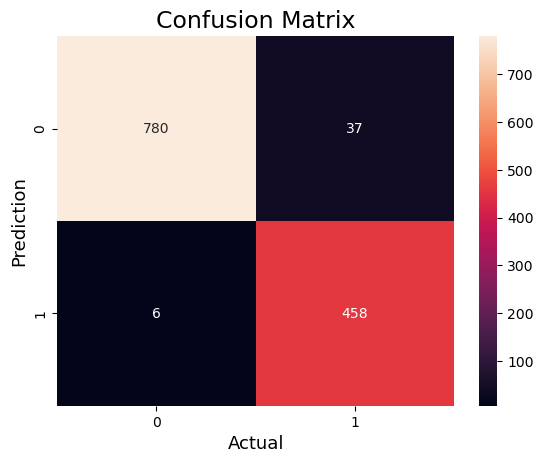

In [85]:
sns.heatmap(cmm2,annot=True,fmt='g')
plt.ylabel('Prediction',fontsize=13)
plt.xlabel('Actual',fontsize=13)
plt.title('Confusion Matrix', fontsize=17)
plt.show()

In [86]:
print(classification_report(y_testt,y_predd2,labels=[1]))

              precision    recall  f1-score   support

           1       0.93      0.99      0.96       464

   micro avg       0.93      0.99      0.96       464
   macro avg       0.93      0.99      0.96       464
weighted avg       0.93      0.99      0.96       464



In [87]:
# using scaled numerical data in DECISION TREE algorithm
# The ACCURACY is 96.7%
# The False Negative value is 35

In [ ]:
# SCALED DATA CONCLUSION
# Here i've used LOGISTIC REGRESSION, RANDOM FOREST AND DECISION TREE algorithms 

    ALGORITHMS              ACC (%)     PS       RC     FN
------------------------------------------------------------
1) Logistic regression        91       0.8      0.8     56
2) Random forest             97.8      0.9      0.9     12
3) Decision tree             96.7      0.9      0.98    35

In [88]:
#   Conclusion, The model is more effective when using Random forest algorithm for prediciton 
#   and worst prediction in Logistic regrssion.

In [89]:
print('Overall conclusion, The Random Forest algorithm is the best ALGORITHM for this model. \nIt gives 97% accuracy for both scaled and unscaled data and low False Negative vallues like 15 and 12.')

Overall conclusion, The Random Forest algorithm is the best ALGORITHM for this model. 
It gives 97% accuracy for both scaled and unscaled data and low False Negative vallues like 15 and 12.


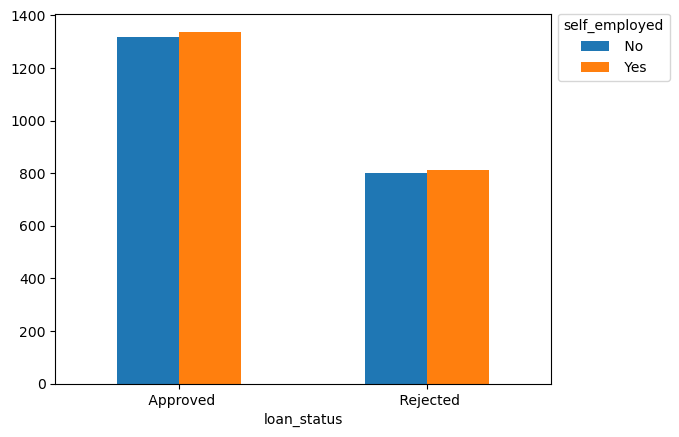

In [90]:
#Bar plot between annual income and loan amount
import matplotlib.pyplot as plt
crosstb = pd.crosstab(df1.loan_status,df1.self_employed)
barplot = crosstb.plot.bar(rot=0)
barplot.legend(title='self_employed', bbox_to_anchor=(1, 1.02), loc='upper left')

In [91]:
#The Above Plot shows the relation between self employed & Loan Status 

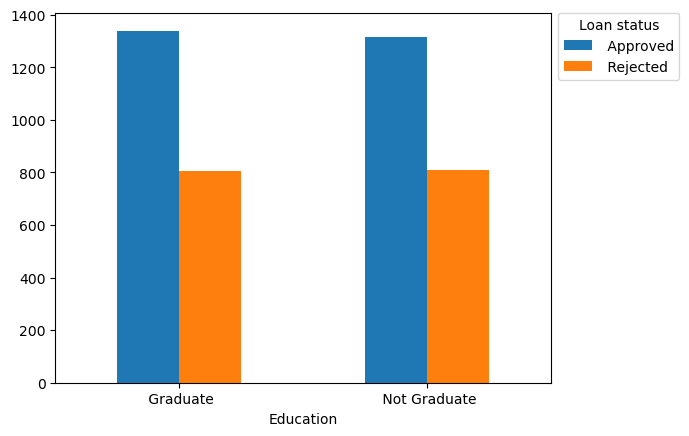

In [92]:
crosstb1 = pd.crosstab(df1.Education,df1.loan_status)
barplot1 = crosstb1.plot.bar(rot=0)
barplot1.legend(title='Loan status', bbox_to_anchor=(1, 1.02), loc='upper left')

In [93]:
#This above plot shows the relation between education and loan status

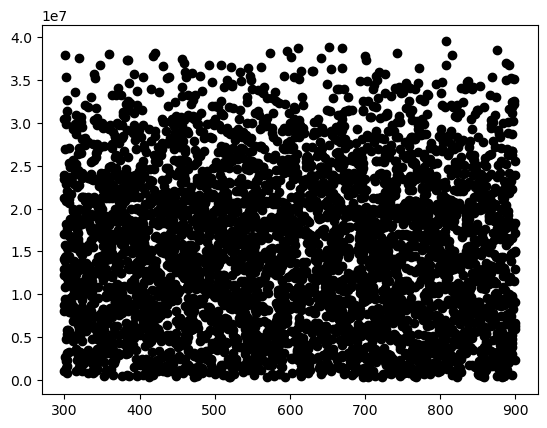

In [94]:
#Scatter plot for cibil_score and loan_amount
plt.scatter(df1['cibil_score'], df1['loan_amount'], c ="black")
plt.show()

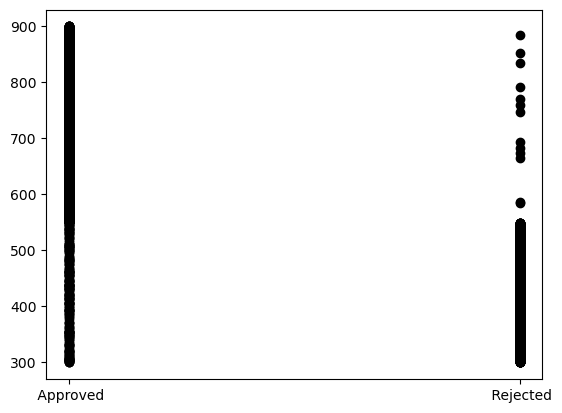

In [95]:
#Scatter plot for loan_status and cibil_score
plt.scatter(df1['loan_status'], df1['cibil_score'], c ="black")
plt.show()

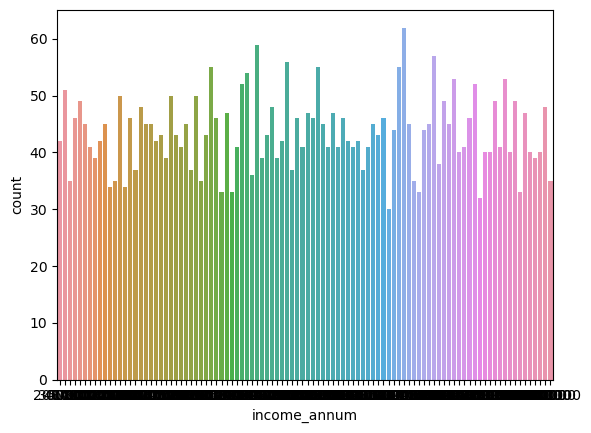

In [96]:
#Count plot for annual income column
sns.countplot(x ='income_annum', data = df1)
plt.show()

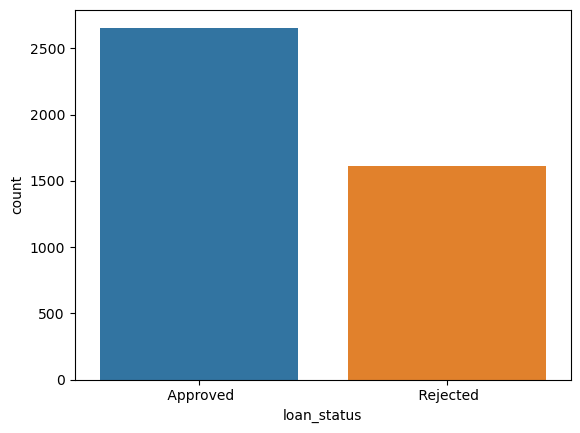

In [97]:
#Count plot for loan status column
sns.countplot(x ='loan_status', data = df1)
plt.show()

In [2]:
#plot
#rocauc curverAUC ROC stands for “Area Under the Curve” of the “Receiver Operating Characteristic” curve. 
#The AUC ROC curve is basically a way of measuring the performance of an ML model

In [102]:
# ROC AUC SCORE FOR UNSCALED DATA
from sklearn.metrics import roc_auc_score
score = roc_auc_score(y_test, y_pred)
print(f"ROC AUC: {score:.4f}")
#this is for Logistic regression

ROC AUC: 0.5037


In [101]:
score = roc_auc_score(y_test, y_pred1)
print(f"ROC AUC: {score:.4f}")
#this is for RANDOM FOREST ALGORITHM

ROC AUC: 0.9694


In [103]:
score = roc_auc_score(y_test, y_pred2)
print(f"ROC AUC: {score:.4f}")
#this is for DECISION TREE ALGORITHM

ROC AUC: 0.9708


In [104]:
# ROC AUC SCORE FOR SCALED DATA
score = roc_auc_score(y_testt, y_predd)
print(f"ROC AUC: {score:.4f}")
#this is for Logistic regression

ROC AUC: 0.9043


In [106]:
score = roc_auc_score(y_testt, y_predd1)
print(f"ROC AUC: {score:.4f}")
#this is for RANDOM FOREST ALGORITHM

ROC AUC: 0.9759


In [107]:
score = roc_auc_score(y_testt, y_predd2)
print(f"ROC AUC: {score:.4f}")
#this is for DECISION TREE ALGORITHM

ROC AUC: 0.9709


In [108]:
# CONCLUSION
# BASED ON THE ROC AND AUC CURVE, RANDOM FOREST ALGORITHM IS MORE EFFECTIVE FOR THIS DATASET.